<a href="https://colab.research.google.com/github/jbastianrj/Dissimilarity-measures-for-time-series-clustering-/blob/main/portafolios1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación de librerías

In [ ]:
! pip install skfolio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.1/691.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.3.4
    Uninstalling cvxpy-1.3.4:
      Successfully uninstalled cvxpy-1.3.4


In [ ]:
from plotly.io import show
from sklearn.model_selection import train_test_split

from skfolio import Population, RiskMeasure
from skfolio.cluster import HierarchicalClustering, LinkageMethod
#from skfolio.datasets import load_sp500_dataset
from skfolio.distance import (
    CovarianceDistance,
    DistanceCorrelation,
    KendallDistance,
    MutualInformation,
    NBinsMethod,
    PearsonDistance,
    SpearmanDistance,
)
from skfolio.optimization import (
    EqualWeighted,
    HierarchicalRiskParity,
    HierarchicalEqualRiskContribution,
    MeanRisk, ObjectiveFunction,
)
from skfolio.preprocessing import prices_to_returns

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import scipy.spatial.distance as ssd
from skfolio.datasets import load_sp500_dataset
from skfolio.preprocessing import prices_to_returns
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis

# Cargamos los datos de series ajustadas

In [ ]:
# Cargamos los datos y obtención de rendimientos
prices = load_sp500_dataset()

SP = prices_to_returns(prices)*100  # Para expresarlo en términos de porcentajes
SP_train, SP_test = train_test_split(SP, test_size=0.2, shuffle=False)

In [ ]:
# stocks_sp = pd.read_csv("adjusted_data_sp2.csv")
dtw20 = pd.read_csv("DTW_train_20activos_test20.csv",  index_col=0) # Ya está normallizada
euclidiana = pd.read_csv("euclidiana.csv", index_col=0) # no normalizada


In [ ]:
dtw20

,AAPL,AMD,BAC,BBY,CVX,GE,HD,JNJ,JPM,KO,LLY,MRK,MSFT,PEP,PFE,PG,RRC,UNH,WMT,XOM
AAPL,0.000000,0.911028,0.754407,0.801088,0.661214,0.669234,0.656048,0.665152,0.714701,0.657903,0.658894,0.658737,0.654229,0.656777,0.654357,0.656438,0.864165,0.703085,0.645703,0.657271
AMD,0.911028,0.000000,0.929148,0.951515,0.919200,0.903207,0.891142,0.940481,0.896120,0.928081,0.912402,0.911613,0.887450,0.929862,0.905725,0.935708,1.000000,0.912425,0.912682,0.923953
BAC,0.754407,0.929148,0.000000,0.810565,0.549583,0.520344,0.586024,0.560191,0.498035,0.549403,0.582371,0.572466,0.599468,0.560268,0.572395,0.551526,0.853780,0.639405,0.577828,0.543645
BBY,0.801088,0.951515,0.810565,0.000000,0.750589,0.747787,0.715359,0.749858,0.764621,0.746301,0.737749,0.747912,0.728974,0.740538,0.732977,0.748212,0.919795,0.762263,0.729307,0.750012
CVX,0.661214,0.919200,0.549583,0.750589,0.000000,0.410198,0.469639,0.388765,0.537710,0.393308,0.425719,0.418702,0.486883,0.407971,0.425864,0.386008,0.787514,0.542614,0.433494,0.299811
GE,0.669234,0.903207,0.520344,0.747787,0.410198,0.000000,0.467748,0.411897,0.505153,0.404140,0.449026,0.435100,0.482686,0.423227,0.434973,0.406047,0.813654,0.551678,0.440162,0.399885
HD,0.656048,0.891142,0.586024,0.715359,0.469639,0.467748,0.000000,0.458989,0.553377,0.455311,0.485525,0.485248,0.507793,0.461546,0.476583,0.458936,0.817011,0.570980,0.452973,0.463841
JNJ,0.665152,0.940481,0.560191,0.749858,0.388765,0.411897,0.458989,0.000000,0.542443,0.341758,0.388735,0.381420,0.468786,0.355895,0.389671,0.337754,0.830156,0.528844,0.392532,0.367965
JPM,0.714701,0.896120,0.498035,0.764621,0.537710,0.505153,0.553377,0.542443,0.000000,0.533811,0.558809,0.554016,0.564401,0.543521,0.546073,0.539385,0.828822,0.614279,0.552995,0.531896
KO,0.657903,0.928081,0.549403,0.746301,0.393308,0.404140,0.455311,0.341758,0.533811,0.000000,0.405560,0.400226,0.467117,0.344014,0.407805,0.341094,0.819180,0.531656,0.393199,0.371609


In [ ]:
euclidiana_normal = normalizar_matriz(euclidiana)

,AAPL,AMD,BAC,BBY,CVX,GE,HD,JNJ,JPM,KO,LLY,MRK,MSFT,PEP,PFE,PG,RRC,UNH,WMT,XOM
AAPL,0.000000,336.904736,282.926426,319.301973,247.318454,236.367359,248.419497,244.962226,265.413330,245.457360,256.925718,253.114332,235.769255,251.331834,253.848406,247.194902,367.241095,280.853394,245.354233,243.917994
AMD,336.904736,0.000000,340.290441,374.820645,321.411278,312.783554,319.038597,324.528536,325.600582,326.352854,331.169556,330.148736,311.641748,327.854118,329.072518,329.607161,417.263728,351.178682,328.167626,321.107855
BAC,282.926426,340.290441,0.000000,306.951098,214.036017,188.783321,218.352035,220.037821,160.162110,221.728455,229.344501,227.859392,232.099770,225.392332,223.217344,220.686404,348.163478,254.001974,226.183768,215.290593
BBY,319.301973,374.820645,306.951098,0.000000,281.201925,267.222812,261.027171,275.801679,288.040644,278.799885,284.202803,284.595000,278.864233,280.568776,282.915564,278.219164,389.953760,311.152475,267.457425,279.547995
CVX,247.318454,321.411278,214.036017,281.201925,0.000000,150.893869,176.970609,140.213402,197.542577,143.607375,163.033046,157.794553,177.470589,148.963580,156.052413,145.696701,294.121376,204.713205,162.438984,83.397629
GE,236.367359,312.783554,188.783321,267.222812,150.893869,0.000000,160.297848,144.962494,169.362846,148.598566,162.858748,161.132968,170.520641,154.951055,155.586324,147.976504,317.013098,208.639676,153.599202,145.941887
HD,248.419497,319.038597,218.352035,261.027171,176.970609,160.297848,0.000000,167.281573,195.627623,166.670929,182.950217,180.915995,183.751203,171.366574,178.964604,170.294669,332.017360,219.194231,148.396502,171.677378
JNJ,244.962226,324.528536,220.037821,275.801679,140.213402,144.962494,167.281573,0.000000,200.168750,123.899296,131.266579,125.753443,171.693493,130.494816,124.985794,121.517552,317.341187,195.087182,144.287985,130.983118
JPM,265.413330,325.600582,160.162110,288.040644,197.542577,169.362846,195.627623,200.168750,0.000000,201.430985,209.218253,205.881401,205.877976,206.294695,204.253227,201.530880,339.033510,240.545279,202.132575,196.651538
KO,245.457360,326.352854,221.728455,278.799885,143.607375,148.598566,166.670929,123.899296,201.430985,0.000000,149.491108,147.418539,175.120944,117.944938,146.660934,121.972990,318.282179,201.199691,145.905688,134.121948


In [ ]:
ssd.squareform(dtw20)

array([0.91102768, 0.75440677, 0.80108788, 0.66121419, 0.66923393,
       0.65604786, 0.6651521 , 0.71470062, 0.65790336, 0.65889449,
       0.65873705, 0.6542294 , 0.65677651, 0.65435731, 0.65643841,
       0.86416507, 0.70308459, 0.64570257, 0.65727134, 0.92914782,
       0.95151542, 0.91919961, 0.90320724, 0.89114233, 0.94048067,
       0.89612021, 0.92808085, 0.91240227, 0.91161273, 0.88744994,
       0.92986173, 0.90572525, 0.93570847, 1.        , 0.91242483,
       0.91268167, 0.92395261, 0.81056509, 0.54958345, 0.52034392,
       0.58602428, 0.56019063, 0.49803527, 0.54940305, 0.58237063,
       0.57246598, 0.5994683 , 0.56026802, 0.57239532, 0.55152599,
       0.85378005, 0.63940492, 0.5778279 , 0.54364459, 0.75058856,
       0.74778657, 0.71535938, 0.74985833, 0.76462105, 0.74630092,
       0.73774934, 0.74791162, 0.72897374, 0.74053818, 0.73297666,
       0.74821235, 0.91979462, 0.76226271, 0.72930737, 0.7500118 ,
       0.41019803, 0.46963943, 0.38876471, 0.5377095 , 0.39330

In [ ]:
# stocks_sp

In [ ]:
# Crear una tabla pivote con las columnas 'Date' como índice, 'Stock' como columnas y 'Close' como valores
# pivot_df = stocks_sp.pivot_table(index='Date', columns='Stock', values='Close')


In [ ]:
# Eliminamos el activo libre de riesgo solo sirve de comparacipon futura
# pivot_df = pivot_df.drop(columns=['ZB=F'])

In [ ]:
# pivot_df

In [ ]:
# Z = prices_to_returns(pivot_df)
# Z_train, Z_test = train_test_split(Z, test_size=0.2, shuffle=False)

In [ ]:
 Z_train, Z_test = SP_train, SP_test

In [ ]:
# Z_test

# Cálculo de la Matriz DTW a partir de los precios

In [ ]:
#stocks = ['AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ', 'NVDA']

# stocks = ['AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ',
# 'NVDA', 'PFE', 'T', 'ECL','BABA', 'SAN', 'NESN.SW', '0941.HK', 'BHP']

# Z = Z[stocks]

# Guardar el DataFrame en un archivo de texto
# Z.to_csv('rendimientos_python.txt', sep='\t', float_format='%.6f', index_label='Date')

In [ ]:
# np.savetxt('precios_python.txt', pivot_df)

In [ ]:
# np.savetxt('rendimientos_python.txt', Z)

In [ ]:
# !pip install fastdtw

In [ ]:
Z_train.columns

Index(['AAPL', 'AMD', 'BAC', 'BBY', 'CVX', 'GE', 'HD', 'JNJ', 'JPM', 'KO',
       'LLY', 'MRK', 'MSFT', 'PEP', 'PFE', 'PG', 'RRC', 'UNH', 'WMT', 'XOM'],
      dtype='object')

In [ ]:
# import pandas as pd
# import numpy as np
# from fastdtw import fastdtw

# # Función para calcular la distancia DTW entre dos series temporales
# def calculate_dtw_distance(series1, series2):
#     distance, _ = fastdtw(series1, series2)
#     return distance

# # Calcular la matriz de distancias DTW
# #assets = ('AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ', 'NVDA')
# assets = ('AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ',
#           'NVDA', 'PFE', 'T', 'ECL','BABA', 'SAN', 'NESN.SW', '0941.HK', 'BHP')

# num_assets = len(assets)
# distance_matrix = np.zeros((num_assets, num_assets))

# # Función para calcular la distancia DTW entre dos series temporales
# def calculate_dtw_distance(series1, series2):
#     distance, _ = fastdtw(series1, series2)
#     return distance

# # Llenar la matriz de distancias DTW
# for i in range(num_assets):
#     for j in range(num_assets):
#         asset1 = pivot_df[assets[i]].values
#         asset2 = pivot_df[assets[j]].values
#         distance = calculate_dtw_distance(asset1, asset2)
#         distance_matrix[i, j] = distance

# # Crear un DataFrame con la matriz de distancias DTW
# distance_df = pd.DataFrame(distance_matrix, index=assets, columns=assets)

# # Mostrar la matriz de distancias DTW
# print("Matriz de Distancias DTW:")
# print(distance_df)

In [ ]:
#distance_df

In [ ]:
# Exportar la matriz de distancias DTW a un archivo Excel
# excel_file = "rendimientos_Python.xlsx"
# Z.to_excel(excel_file)



In [ ]:
# Z_train

# Cálculo de DTW

In [ ]:
# !pip install dtw-python # Es muy importante no confundir con la librería dtw del mismo pipy ya que son distintas

In [ ]:
# Calculo de la DTW
# import pandas as pd
# import numpy as np
# from dtw import dtw


# # Función para calcular la distancia DTW entre dos series temporales
# def calculate_dtw_distance(series1, series2, symmetric = 1):
#     alignment = dtw(series1.T, series2.T, dist_method="euclidean", step_pattern=f"symmetric{symmetric}")
#     # 1: Identica con dtw de R
#     # 2: Identica con DTWARP de TSclust
#     dist = alignment.distance
#     return dist

# # Calcular la matriz de distancias DTW
# #assets = ('AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ', 'NVDA')
# assets = ('AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ',
#          'NVDA', 'PFE', 'T', 'ECL','BABA', 'SAN', 'NESN.SW', '0941.HK', 'BHP')

# num_assets = len(assets)
# distance_matrix = np.zeros((num_assets, num_assets))

# # Llenar la matriz de distancias DTW
# for i in range(num_assets):
#     for j in range(num_assets):
#         asset1 = Z_train[assets[i]].values
#         asset2 = Z_train[assets[j]].values
#         distance = calculate_dtw_distance(asset1, asset2, 1)
#         distance_matrix[i, j] = distance

# # Crear un DataFrame con la matriz de distancias DTW
# distance_df = pd.DataFrame(distance_matrix, index=assets, columns=assets)


In [ ]:
# Función que normaliza las matrices (min-max)

def normalizar_matriz(matriz):
    """
    Normaliza una matriz al rango de 0 a 1 utilizando la técnica min-max.

    Parámetros:
    - matriz: np.ndarray
        La matriz que se desea normalizar.

    Retorna:
    - np.ndarray
        La matriz normalizada.
    """
    # Calcula los valores mínimo y máximo de la matriz
    min_valor = np.min(matriz)
    max_valor = np.max(matriz)

    # Normaliza la matriz al rango de 0 a 1
    matriz_normalizada = (matriz - min_valor) / (max_valor - min_valor)

    return matriz_normalizada

In [ ]:
# distance_df = normalizar_matriz(distance_df)

In [ ]:
# distance_df.to_csv('DTW_train_19activos_test20.csv')

In [ ]:
euclidiana_normal = normalizar_matriz(euclidiana)

## Creación de instancias clases de DTW, D1 y D2

In [ ]:
! pip install dtw-python
from dtw import dtw

# Función para calcular la distancia DTW entre dos series temporales
def calculate_dtw_distance(series1, series2, symmetric=1):
    alignment = dtw(series1, series2, dist_method="euclidean", step_pattern=f"symmetric{symmetric}")
    return alignment.distance

from skfolio.distance import BaseDistance
#from scipy.spatial.distance import euclidean

class DTWDistance(BaseDistance):
    def __init__(self, symmetric=True):
        self.symmetric = symmetric  # Indica si se usará un patrón de pasos simétrico

    def fit(self, X, y=None):
        # Validar los datos
        X = self._validate_data(X)

        # Calcular la matriz de distancias DTW
        n_assets = X.shape[1]
        distance_matrix = np.zeros((n_assets, n_assets))

        for i in range(n_assets):
            for j in range(n_assets):
                if i == j:
                    distance_matrix[i, j] = 0
                else:
                    distance = calculate_dtw_distance(X[:, i], X[:, j],  1)
                    distance_matrix[i, j] = distance

        self.codependence_ = distance_matrix
        self.distance_ = distance_matrix
        return self

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.5/770.5 kB 3.9 MB/s eta 0:00:00
Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [ ]:
# import dtw
import numpy.typing as npt  # Importa numpy.typing para usar npt.ArrayLike
from skfolio.distance._distance import BaseDistance
from skfolio.distance import BaseDistance
from skfolio.utils.stats import (
    cov_to_corr,
)

#from scipy.spatial.distance import euclidean

class DTWDistance(BaseDistance):
    def __init__(self, absolute: bool = False, power: float = 1):
        self.absolute = absolute
        self.power = power

    def fit(self, X: npt.ArrayLike, y=None) -> "DTWDistance":
        """Fit
        """
        X = self._validate_data(X)

        # Calcular la matriz de distancias DTW
        n_assets = X.shape[1]
        distance_matrix = np.zeros((n_assets, n_assets))

        for i in range(n_assets):
            for j in range(n_assets):
                #distancex = X.corr()# dtw(X[:, i], X[:, j], dist_method='euclidean', step_pattern= 'symmetric1').distance
                distance_matrix[i, j] = dtw20.values[i,j]#distance_df.values[i,j]


        #corr = np.corrcoef(X.T)#distance_matrix
        self.codependence_ = distance_matrix  # Matriz de distancias DTW
        self.distance_ = distance_matrix

        return self

In [ ]:
corr1 = pd.read_csv("corr1_train_20activos_test20.csv",  index_col=0) # Ya está normallizada

In [ ]:
# import dtw
import numpy.typing as npt  # Importa numpy.typing para usar npt.ArrayLike
from skfolio.distance._distance import BaseDistance
from skfolio.distance import BaseDistance
from skfolio.utils.stats import (
    cov_to_corr,
)

#from scipy.spatial.distance import euclidean

class Corr_1(BaseDistance):
    def __init__(self, absolute: bool = False, power: float = 1):
        self.absolute = absolute
        self.power = power

    def fit(self, X: npt.ArrayLike, y=None) -> "DTWDistance":
        """Fit
        """
        X = self._validate_data(X)

        # Calcular la matriz de distancias DTW
        n_assets = X.shape[1]
        distance_matrix = np.zeros((n_assets, n_assets))

        for i in range(n_assets):
            for j in range(n_assets):
                #distancex = X.corr()# dtw(X[:, i], X[:, j], dist_method='euclidean', step_pattern= 'symmetric1').distance
                distance_matrix[i, j] = corr1.values[i,j]#distance_df.values[i,j]


        #corr = np.corrcoef(X.T)#distance_matrix
        self.codependence_ = distance_matrix  # Matriz de distancias DTW
        self.distance_ = distance_matrix

        return self

In [ ]:
corr2 = pd.read_csv("corr2_train_20activos_test20.csv",  index_col=0) # Ya está normallizada

In [ ]:
# import dtw
import numpy.typing as npt  # Importa numpy.typing para usar npt.ArrayLike
from skfolio.distance._distance import BaseDistance
from skfolio.distance import BaseDistance
from skfolio.utils.stats import (
    cov_to_corr,
)

#from scipy.spatial.distance import euclidean

class Corr_2(BaseDistance):
    def __init__(self, absolute: bool = False, power: float = 1):
        self.absolute = absolute
        self.power = power

    def fit(self, X: npt.ArrayLike, y=None) -> "DTWDistance":
        """Fit
        """
        X = self._validate_data(X)

        # Calcular la matriz de distancias DTW
        n_assets = X.shape[1]
        distance_matrix = np.zeros((n_assets, n_assets))

        for i in range(n_assets):
            for j in range(n_assets):
                #distancex = X.corr()# dtw(X[:, i], X[:, j], dist_method='euclidean', step_pattern= 'symmetric1').distance
                distance_matrix[i, j] = corr2.values[i,j]#distance_df.values[i,j]


        #corr = np.corrcoef(X.T)#distance_matrix
        self.codependence_ = distance_matrix  # Matriz de distancias DTW
        self.distance_ = distance_matrix

        return self

In [ ]:
# Clase para Euclidiana

from skfolio.distance import BaseDistance
#from scipy.spatial.distance import euclidean

class EuclidianDistance(BaseDistance):
    def __init__(self, symmetric=True):
        self.symmetric = symmetric  # Indica si se usará un patrón de pasos simétrico

    def fit(self, X, y=None):
        # Validar los datos
        X = self._validate_data(X)

        # Calcular la matriz de distancias DTW
        n_assets = X.shape[1]
        distance_matrix = np.zeros((n_assets, n_assets))

        for i in range(n_assets):
            for j in range(n_assets):
                if i == j:
                    distance_matrix[i, j] = 0
                else:
                    # distance = calculate_dtw_distance(X[:, i], X[:, j],  1)
                    distance_matrix[i, j] = euclidiana_normal.values[i,j]#distance

        self.codependence_ = distance_matrix
        self.distance_ = distance_matrix
        return self

# Creación de los portafolios

Cálculo de los pesos usando Hierarchical Equal Risk Contribution usando CVAR

The default linkage method is set to the Ward variance minimization algorithm, which is more stable and has better properties than the single-linkage method
(“A review of two decades of correlations, hierarchies, networks and clustering in financial markets”, Gautier Marti, Frank Nielsen, Mikołaj Bińkowski, Philippe Donnat (2020).)

## Benchmark Equal Weighted

In [ ]:
bench = EqualWeighted(
      portfolio_params=dict(name="EqualWeighted")
)
bench.fit(Z_train)
bench.weights_

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [ ]:
portfolio = bench.fit_predict(Z_train)
print(portfolio.cvar)

2.6703292705764703


In [ ]:
# Risk contribution usando CVAR

ptf = bench.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

## Markovitz Mean Risk

In [ ]:
model0 = MeanRisk(
    risk_measure=RiskMeasure.VARIANCE, # default
    # objective_function=ObjectiveFunction.MAXIMIZE_RATIO,
    objective_function=ObjectiveFunction.MINIMIZE_RISK, # default
    portfolio_params=dict(name="Mean-risk"),
)
model0.fit(Z_train)
model0.weights_

array([2.78120002e-02, 4.43723043e-11, 9.90081771e-12, 9.35212270e-03,
       1.10007839e-01, 6.20801653e-11, 4.68662498e-11, 1.90807037e-01,
       1.08945081e-11, 1.10726922e-01, 3.67433840e-02, 1.66878626e-04,
       1.63009140e-02, 1.22545147e-01, 8.94608296e-10, 1.64015669e-01,
       1.19438235e-02, 1.23143284e-02, 9.42476246e-02, 9.30163097e-02])

In [ ]:
portfolio = model0.fit_predict(Z_train)
print(portfolio.cvar)

2.20757341196456


In [ ]:
# Risk contribution usando CVAR

ptf = model0.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

## Hierarchical Risk Parity (Lopéz de Prado 2016)

In [ ]:
model1 = HierarchicalRiskParity(
    distance_estimator=PearsonDistance(), # Default
    hierarchical_clustering_estimator=HierarchicalClustering(
    #     max_clusters=8,
        linkage_method=LinkageMethod.WARD, # Default
        ),
    # distance_estimator=Corr_2, # No se puede usar
    # distance_estimator=KendallDistance(),
    portfolio_params=dict(name="HRP"),
)
model1.fit(Z_train)
model1.weights_

array([0.02898201, 0.01494839, 0.01787051, 0.01916545, 0.05947816,
       0.0668875 , 0.03919105, 0.06583499, 0.02753069, 0.08731924,
       0.06651152, 0.067999  , 0.05473708, 0.08231199, 0.04144045,
       0.08911169, 0.01010366, 0.02281643, 0.05676397, 0.0809962 ])

In [ ]:
portfolio = model1.fit_predict(Z_train)
print(portfolio.cvar)

2.3972442864933425


In [ ]:
# Risk contribution usando CVAR

ptf = model1.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model1.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
show(fig)

## Modelos basados en Hierarchical Equal Risk Contribution (Raffinot, 2018)

In [ ]:
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

model2 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    # distance_estimator=Corr_2(), # Coincide con Pearson
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=6,
        linkage_method=LinkageMethod.WARD, # Default
    ),
    portfolio_params=dict(name="D2-Ward"),
)
model2.fit(Z_train)
model2.weights_

array([0.01351832, 0.00729099, 0.04831247, 0.00941443, 0.17098952,
       0.11316751, 0.02543936, 0.04167484, 0.05870412, 0.04600527,
       0.02532249, 0.02588881, 0.02669769, 0.04208886, 0.02623262,
       0.04694965, 0.02904629, 0.01643789, 0.03684615, 0.18997273])

In [ ]:
# @title
portfolio = model2.fit_predict(Z_train)
print(portfolio.cvar)

2.5993575818142673


In [ ]:
# @title
# Risk contribution usando CVAR

ptf = model2.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model2.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
fig.update_layout(
     title={
        'text': 'Dendrograma y heatmap usando <i>D<sub>2</sub></i> (8 clusters)',
        'x':0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Activos'  # Cambiar la etiqueta del eje X
    ),
    yaxis=dict(
        showline=False,  # Ocultar la línea del eje Y
        showticklabels=False,  # Ocultar las etiquetas de los ticks del eje Y
        showgrid=False,  # Ocultar la cuadrícula del eje Y
        title=''  # Eliminar el título del eje Y
    )
)
show(fig)

In [ ]:
model3 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    # distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    distance_estimator=Corr_1(),
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=8,
        linkage_method=LinkageMethod.WARD, # Default
    ),
    portfolio_params=dict(name="D1-Ward"),
)

model3.fit(Z_train)
model3.weights_

array([0.12474875, 0.06728216, 0.0260996 , 0.02121755, 0.04082619,
       0.06113591, 0.05733338, 0.00760211, 0.03171343, 0.05265972,
       0.0046192 , 0.0047225 , 0.24636955, 0.04817681, 0.00478522,
       0.05374069, 0.0123052 , 0.00626219, 0.08304116, 0.0453587 ])

In [ ]:
portfolio = model3.fit_predict(Z_train)
print(portfolio.cvar)

2.963765728514031


In [ ]:
# Risk contribution usando CDAR

ptf3 = model3.predict(Z_train)
ptf3.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model3.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
fig.update_layout(
     title={
        'text': 'Dendrograma y heatmap usando <i>D<sub>1</sub></i> (8 clusters)',
        'x':0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Activos'  # Cambiar la etiqueta del eje X
    ),
    yaxis=dict(
        showline=False,  # Ocultar la línea del eje Y
        showticklabels=False,  # Ocultar las etiquetas de los ticks del eje Y
        showgrid=False,  # Ocultar la cuadrícula del eje Y
        title=''  # Eliminar el título del eje Y
    )
)

show(fig)

In [ ]:
model4 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    # distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    distance_estimator=DTWDistance(),
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=8,
        linkage_method=LinkageMethod.WARD, # Default
    ),
    portfolio_params=dict(name="DTW-Ward"),
)

model4.fit(Z_train)
model4.weights_

array([0.01818204, 0.16359686, 0.21644809, 0.01384697, 0.01120473,
       0.00861803, 0.02290995, 0.01458176, 0.26300446, 0.01314673,
       0.00886017, 0.00905833, 0.02198621, 0.01202755, 0.00917862,
       0.0134166 , 0.04348956, 0.11433012, 0.00966452, 0.01244868])

In [ ]:
portfolio = model4.fit_predict(Z_train)
print(portfolio.cvar)

3.952142822251078


In [ ]:
# Risk contribution usando CVAR

ptf = model4.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model4.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
fig.update_layout(
     title={
        'text': 'Dendrograma y heatmap usando <i>DTW</i> (6 clusters)',
        'x':0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Activos'  # Cambiar la etiqueta del eje X
    ),
    yaxis=dict(
        showline=False,  # Ocultar la línea del eje Y
        showticklabels=False,  # Ocultar las etiquetas de los ticks del eje Y
        showgrid=False,  # Ocultar la cuadrícula del eje Y
        title=''  # Eliminar el título del eje Y
    )
)

show(fig)

In [ ]:
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

model5 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    # distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    distance_estimator=Corr_2(), # Coincide con Pearson
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=8,
        # linkage_method=LinkageMethod.WARD, # Default
        linkage_method=LinkageMethod.SINGLE,
    ),
    portfolio_params=dict(name="HERC-Single-D2"),
)
model5.fit(Z_train)
model5.weights_

array([6.39901548e-03, 1.54086844e-02, 2.24229270e-05, 1.07330736e-03,
       1.18896964e-04, 5.25236465e-05, 4.06669190e-05, 3.11047590e-04,
       2.72459315e-05, 2.80436677e-04, 1.88998913e-04, 1.93225727e-04,
       3.90272165e-05, 2.56563199e-04, 1.95791833e-04, 2.86193334e-04,
       7.07793711e-02, 9.04135582e-01, 5.89016052e-05, 1.32096871e-04])

In [ ]:
# @title
portfolio = model5.fit_predict(Z_train)
print(portfolio.cvar)

4.981044229595602


In [ ]:
# @title
# Risk contribution usando CVAR

ptf = model5.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model5.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
show(fig)

In [ ]:
model6 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    # distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    distance_estimator=Corr_1(),
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=8,
        # linkage_method=LinkageMethod.WARD, # Default
        linkage_method=LinkageMethod.SINGLE,
    ),
    portfolio_params=dict(name="HERC-Single-D1"),
)

model6.fit(Z_train)
model6.weights_

array([6.39901548e-03, 1.54086844e-02, 2.24229270e-05, 1.07330736e-03,
       1.18896964e-04, 5.25236465e-05, 4.06669190e-05, 3.11047590e-04,
       2.72459315e-05, 2.80436677e-04, 1.88998913e-04, 1.93225727e-04,
       3.90272165e-05, 2.56563199e-04, 1.95791833e-04, 2.86193334e-04,
       7.07793711e-02, 9.04135582e-01, 5.89016052e-05, 1.32096871e-04])

In [ ]:
portfolio = model6.fit_predict(Z_train)
print(portfolio.cvar)

4.981044229595602


In [ ]:
# Risk contribution usando CDAR

ptf3 = model6.predict(Z_train)
ptf3.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model6.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
show(fig)

In [ ]:
model7 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    # distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    distance_estimator=DTWDistance(),
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=6,
        # linkage_method=LinkageMethod.WARD, # Default
        linkage_method=LinkageMethod.SINGLE,
    ),
    portfolio_params=dict(name="HERC-Single-DTW"),
)

model7.fit(Z_train)
model7.weights_

array([1.84297692e-02, 7.23048094e-01, 4.80585273e-04, 5.66701226e-02,
       1.46361346e-03, 1.12572685e-03, 8.71604423e-04, 1.90473544e-03,
       5.83955583e-04, 1.71728602e-03, 1.15735643e-03, 1.18323981e-03,
       8.36461068e-04, 1.57109405e-03, 1.19895365e-03, 1.75253757e-03,
       1.79486041e-01, 3.63029589e-03, 1.26242413e-03, 1.62610341e-03])

In [ ]:
portfolio = model7.fit_predict(Z_train)
print(portfolio.cvar)

6.852325288246954


In [ ]:
# Risk contribution usando CVAR

ptf = model7.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model7.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
show(fig)

In [ ]:
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

model8 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    # distance_estimator=Corr_2(), # Coincide con Pearson
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=8,
        # linkage_method=LinkageMethod.WARD, # Default
        linkage_method=LinkageMethod.AVERAGE,
    ),
    portfolio_params=dict(name="HERC-Average-D2"),
)
model8.fit(Z_train)
model8.weights_

array([0.01171483, 0.00631829, 0.00094723, 0.03919716, 0.00502264,
       0.00221879, 0.00171792, 0.01313979, 0.00115097, 0.01184667,
       0.00798401, 0.00816256, 0.00164865, 0.01083817, 0.00827096,
       0.01208985, 0.76341291, 0.08625011, 0.00248822, 0.00558026])

In [ ]:
# @title
portfolio = model8.fit_predict(Z_train)
print(portfolio.cvar)

6.582470046806849


In [ ]:
# @title
# Risk contribution usando CVAR

ptf = model8.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model8.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
show(fig)

In [ ]:
model9  = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    # distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    distance_estimator=Corr_1(),
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=8,
        # linkage_method=LinkageMethod.WARD, # Default
        linkage_method=LinkageMethod.AVERAGE,
    ),
    portfolio_params=dict(name="HERC-Average-D1"),
)

model9.fit(Z_train)
model9.weights_

array([0.01171483, 0.00631829, 0.00094723, 0.03919716, 0.00502264,
       0.00221879, 0.00171792, 0.01313979, 0.00115097, 0.01184667,
       0.00798401, 0.00816256, 0.00164865, 0.01083817, 0.00827096,
       0.01208985, 0.76341291, 0.08625011, 0.00248822, 0.00558026])

In [ ]:
portfolio = model9.fit_predict(Z_train)
print(portfolio.cvar)

6.582470046806849


In [ ]:
# Risk contribution usando CDAR

ptf3 = model9.predict(Z_train)
ptf3.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model9.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
show(fig)

In [ ]:
model10 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    # distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    distance_estimator=DTWDistance(),
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=6,
        # linkage_method=LinkageMethod.WARD, # Default
        linkage_method=LinkageMethod.AVERAGE,

    ),
    portfolio_params=dict(name="HERC-Average-DTW"),
)

model10.fit(Z_train)
model10.weights_

array([1.84304202e-02, 7.22503077e-01, 1.62573247e-03, 5.67637858e-02,
       1.53113833e-03, 1.17766308e-03, 9.11816529e-04, 1.99261180e-03,
       1.97541540e-03, 1.79651426e-03, 1.21075192e-03, 1.23782944e-03,
       8.75051810e-04, 1.64357762e-03, 1.25426825e-03, 1.83339217e-03,
       1.79573260e-01, 6.41902732e-04, 1.32066698e-03, 1.70112488e-03])

In [ ]:
portfolio = model10.fit_predict(Z_train)
print(portfolio.cvar)

6.851210364216954


In [ ]:
# Risk contribution usando CVAR

ptf = model10.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model10.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
show(fig)

In [ ]:
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

model11 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    # distance_estimator=Corr_2(), # Coincide con Pearson
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=8,
        # linkage_method=LinkageMethod.WARD, # Default
        linkage_method=LinkageMethod.COMPLETE,
    ),
    portfolio_params=dict(name="HERC-Complete-D2"),
)
model11.fit(Z_train)
model11.weights_

array([0.00683143, 0.0049431 , 0.00570132, 0.04435445, 0.01736326,
       0.01335481, 0.00413162, 0.00389021, 0.00692763, 0.00350737,
       0.00236377, 0.00241664, 0.01349156, 0.00320879, 0.00244873,
       0.00357937, 0.74500134, 0.09120949, 0.0059842 , 0.01929092])

In [ ]:
# @title
portfolio = model11.fit_predict(Z_train)
print(portfolio.cvar)

6.48237892788122


In [ ]:
# @title
# Risk contribution usando CVAR

ptf = model11.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model11.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
show(fig)

In [ ]:
model12 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    # distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    distance_estimator=Corr_1(),
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=8,
        # linkage_method=LinkageMethod.WARD, # Default
        linkage_method=LinkageMethod.COMPLETE,
    ),
    portfolio_params=dict(name="HERC-Complete-D1"),
)

model12.fit(Z_train)
model12.weights_

array([0.00683143, 0.0049431 , 0.00570132, 0.04435445, 0.01736326,
       0.01335481, 0.00413162, 0.00389021, 0.00692763, 0.00350737,
       0.00236377, 0.00241664, 0.01349156, 0.00320879, 0.00244873,
       0.00357937, 0.74500134, 0.09120949, 0.0059842 , 0.01929092])

In [ ]:
portfolio = model12.fit_predict(Z_train)
print(portfolio.cvar)

6.48237892788122


In [ ]:
# Risk contribution usando CDAR

ptf3 = model12.predict(Z_train)
ptf3.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model12.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
show(fig)

In [ ]:
model13 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    # distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    distance_estimator=DTWDistance(),
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=6,
        # linkage_method=LinkageMethod.WARD, # Default
        linkage_method=LinkageMethod.COMPLETE,
    ),
    portfolio_params=dict(name="HERC-Complete-DTW"),
)

model13.fit(Z_train)
model13.weights_

array([1.84304202e-02, 7.22503077e-01, 1.62573247e-03, 5.67637858e-02,
       1.53113833e-03, 1.17766308e-03, 9.11816529e-04, 1.99261180e-03,
       1.97541540e-03, 1.79651426e-03, 1.21075192e-03, 1.23782944e-03,
       8.75051810e-04, 1.64357762e-03, 1.25426825e-03, 1.83339217e-03,
       1.79573260e-01, 6.41902732e-04, 1.32066698e-03, 1.70112488e-03])

In [ ]:
portfolio = model13.fit_predict(Z_train)
print(portfolio.cvar)

6.851210364216954


In [ ]:
# Risk contribution usando CVAR

ptf = model13.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model13.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
show(fig)

## CVaR

In [ ]:
from skfolio.optimization import InverseVolatility, RiskBudgeting

model_cvar = RiskBudgeting(
    risk_measure=RiskMeasure.CVAR,
    # risk_budget=risk_budget,
    portfolio_params=dict(name="CVaR"),
)
model_cvar.fit(Z_train)
model_cvar.weights_

portfolio = model13.fit_predict(Z_train)
print(portfolio.cvar)

array([0.04136294, 0.03069559, 0.03165569, 0.03895297, 0.05782181,
       0.04248258, 0.04404445, 0.06627562, 0.03453273, 0.06501615,
       0.05279582, 0.05099717, 0.04544058, 0.06851468, 0.05155524,
       0.06796348, 0.0400258 , 0.04729621, 0.06122587, 0.06134463])

In [ ]:
ptf_model_test = model_cvar.fit_predict(Z_test)

## Comparación

In [ ]:
population_test = Population([])
for model in [model3, model2, model4, bench, model0, model1, model_cvar]:#
              # model5, model6, model7, model8, model9, model10, model11, model12, model13]:
    population_test.append(model.predict(Z_test))

fig = population_test.plot_cumulative_returns()
fig.update_layout(
     title={
        'text': 'Rendimiento acumulado de distintos portafolios',
        'x':0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Activos'  # Cambiar la etiqueta del eje X
    ),
    yaxis=dict(
        title='Rendimientos acumulados'  # Cambiar la etiqueta del eje Y
    ),
    legend = dict(
        title='Portafolios'  # Cambiar la etiqueta del eje Y
    )
)

show(fig)

In [ ]:
fig = population_test.plot_composition(display_sub_ptf_name=True)
fig.update_layout(
     title={
        'text': 'Composición de activos',
        'x':0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Portafolios'  # Cambiar la etiqueta del eje X
    ),
    yaxis=dict(
        title='Pesos asignados'  # Cambiar la etiqueta del eje Y
    ),
    legend = dict(
        title='Activos'  # Cambiar la etiqueta del eje Y
    )
)


In [ ]:
metricas = population_test.summary()
metricas.to_csv('metricas.csv')

In [ ]:
model14 = HierarchicalEqualRiskContribution(
    risk_measure=RiskMeasure.VARIANCE, # Default
    # distance_estimator=PearsonDistance(absolute=False, power = 1), # Default
    distance_estimator=EuclidianDistance(),
    # distance_estimator=DTWDistance(),
    # distance_estimator=CovarianceDistance(),
    hierarchical_clustering_estimator=HierarchicalClustering(
        max_clusters=6,
        # linkage_method=LinkageMethod.WARD, # Default
        linkage_method=LinkageMethod.COMPLETE,
    ),
    portfolio_params=dict(name="HERC-Complete-Euclidian"),
)



In [ ]:
model14.fit(Z_train)
model14.weights_

array([1.78728729e-02, 1.59996987e-01, 1.57655167e-03, 5.50465978e-02,
       1.48481915e-03, 1.14203704e-03, 8.84232737e-04, 1.93233236e-03,
       1.91565618e-03, 1.74216706e-03, 1.17412489e-03, 1.20038328e-03,
       8.48580205e-04, 1.59385698e-03, 1.21632479e-03, 1.77792936e-03,
       7.45041684e-01, 6.22484229e-04, 1.28071486e-03, 1.64966335e-03])

In [ ]:
# Risk contribution usando CVAR

ptf = model14.predict(Z_train)
ptf.plot_contribution(measure=RiskMeasure.CVAR)

In [ ]:
# Dendograma
fig = model14.hierarchical_clustering_estimator_.plot_dendrogram(heatmap=True)
show(fig)

In [ ]:
population_test = Population([])
for model in [model3, model2, model4, bench, model0, model1, model14, model_cvar]:#
              # model5, model6, model7, model8, model9, model10, model11, model12, model13]:
    population_test.append(model.predict(Z_test))

fig = population_test.plot_cumulative_returns()
fig.update_layout(
     title={
        'text': 'Rendimiento acumulado de distintos portafolios',
        'x':0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Activos'  # Cambiar la etiqueta del eje X
    ),
    yaxis=dict(
        title='Rendimientos acumulados'  # Cambiar la etiqueta del eje Y
    ),
    legend = dict(
        title='Portafolios'  # Cambiar la etiqueta del eje Y
    )
)

show(fig)

In [ ]:
fig = population_test.plot_composition(display_sub_ptf_name=True)
fig.update_layout(
     title={
        'text': 'Composición de activos',
        'x':0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Portafolios'  # Cambiar la etiqueta del eje X
    ),
    yaxis=dict(
        title='Pesos asignados'  # Cambiar la etiqueta del eje Y
    ),
    legend = dict(
        title='Activos'  # Cambiar la etiqueta del eje Y
    )
)


# DWT con pesos

In [ ]:
from skfolio import Portfolio

X = Z_train.iloc[:,[1, 16, 0, 3, 2, 8, 12, 6, 7, 15, 9, 13, 18, 11, 14, 10, 4, 19, 5, 17]]
weights = [0.25,
   0.125,
   0.0625,
   0.0625,
   0.125,
   0.125,
   0.017857,
   0.017857,
   0.017857,
   0.017857,
   0.017857,
   0.017857,
   0.017857,
   0.017857,
   0.017857,
   0.017857,
   0.017857,
   0.017857,
   0.017857,
   0.017857]

portfolio_dtw = Portfolio(X=X, weights=weights, name="my_portfolio")

print(portfolio_dtw.returns)

[ 0.47360986 -0.74052449 -1.37947776 ...  0.99866439 -0.09005351
  1.105216  ]


## GAP y Dendrogramas individuales para WARD

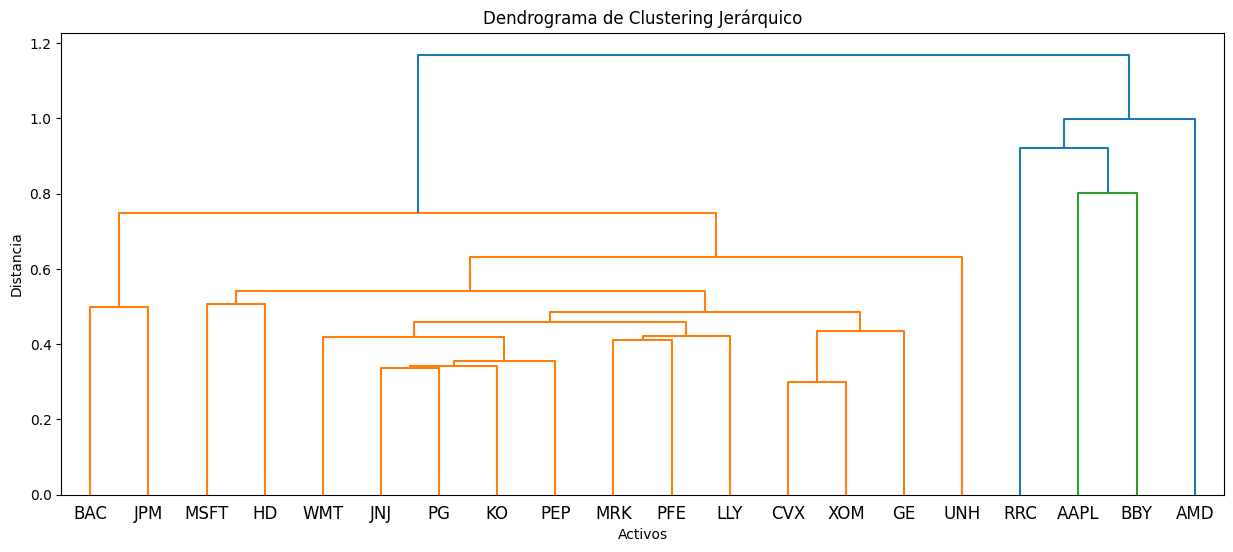

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

distance_df = ssd.squareform(dtw20)

# Calcular la matriz de enlace usando clustering jerárquico
linkage_matrix = linkage(distance_df, method = 'ward', optimal_ordering=True)

# Graficar el dendrograma
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels= dtw20.columns)
plt.xlabel('Activos')
plt.ylabel('Distancia')
plt.title('Dendrograma de Clustering Jerárquico')
plt.show()


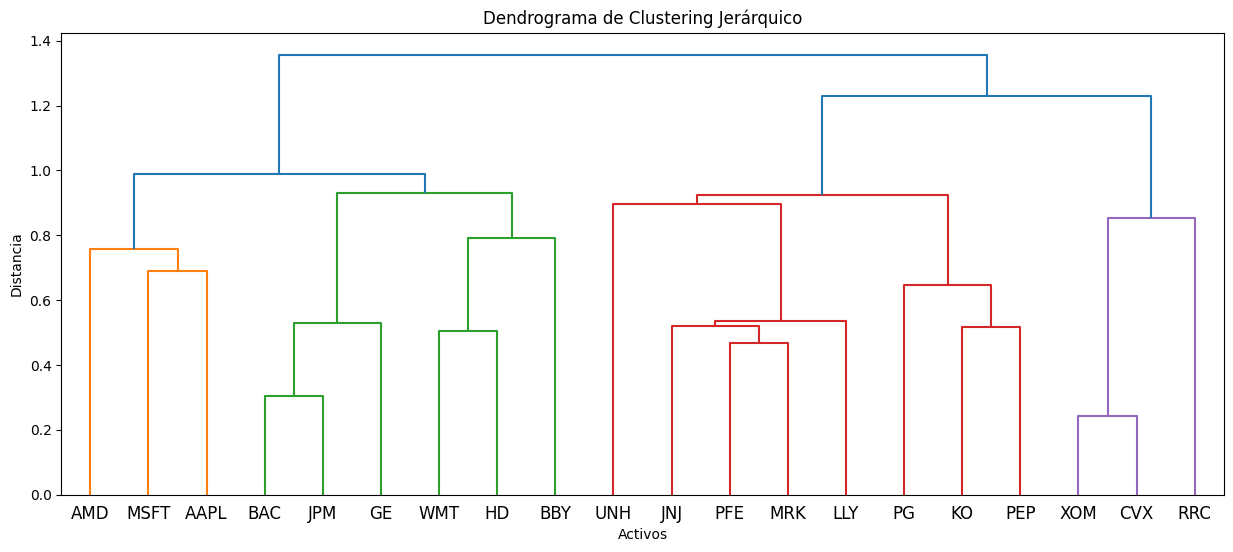

In [ ]:
# Calcular la matriz de enlace usando clustering jerárquico

correlacion_1 = ssd.squareform(normalizar_matriz(1-Z_train.corr('pearson')))

linkage_matrix = linkage(correlacion_1, method = 'ward', optimal_ordering=True)#distance_df, method='ward')
#
# Graficar el dendrograma
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels= Z_train.columns)#distance_df.columns)
plt.xlabel('Activos')
plt.ylabel('Distancia')
plt.title('Dendrograma de Clustering Jerárquico')
plt.show()

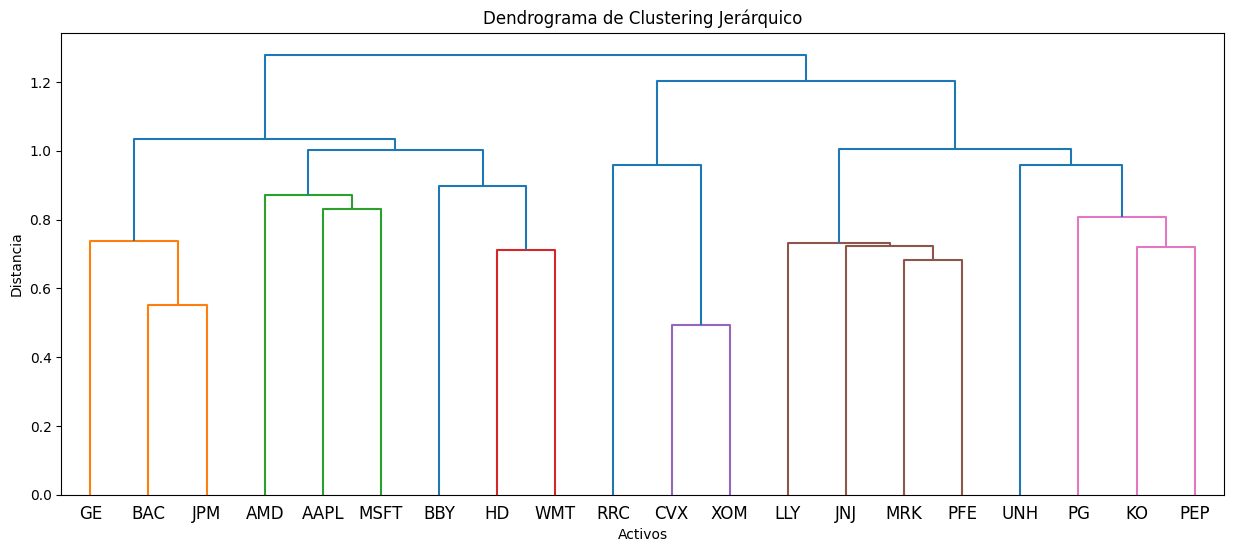

In [ ]:
pearson = Z_train.corr('pearson')
mantegna =  np.sqrt(2*(1-pearson)) # OJO EN SKIFOLIO ES CON FACTOR 2 EN LA INVESTIGACION ES CON FACTOR 0.5

mantegna = ssd.squareform(normalizar_matriz(mantegna))


linkage_matrix = linkage(mantegna, method = 'ward', optimal_ordering=False)#distance_df, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels= Z_train.columns)#distance_df.columns)
plt.xlabel('Activos')
plt.ylabel('Distancia')
plt.title('Dendrograma de Clustering Jerárquico')
plt.show()

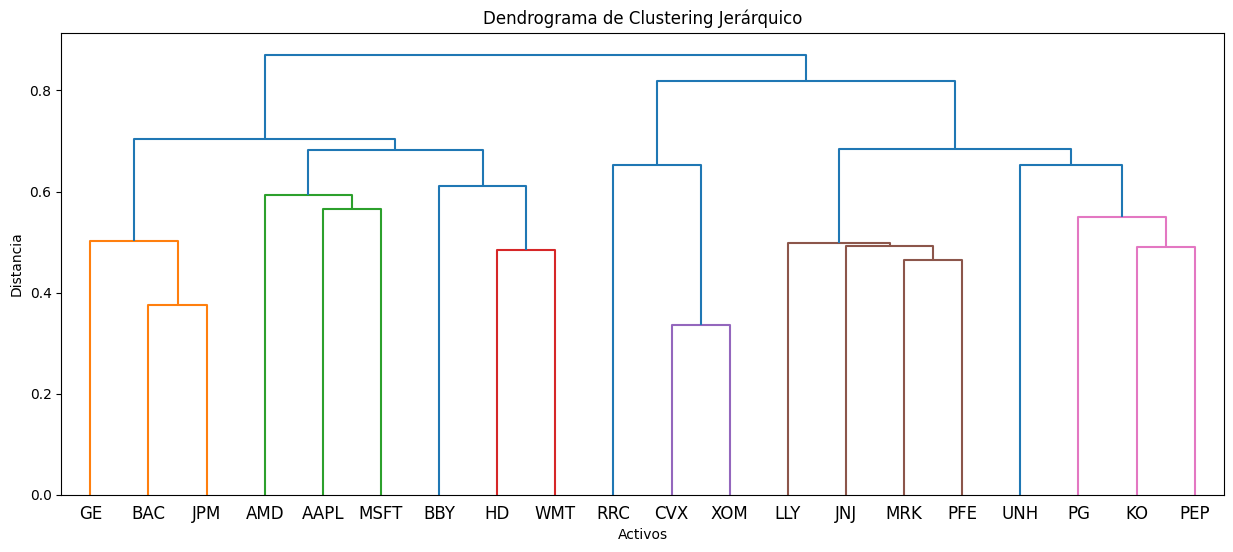

In [ ]:
correlacion_2 = np.sqrt((0.5*(1-pearson)))
correlacion_2 = ssd.squareform(correlacion_2)
# "Building Diversified Portfolios that Outperform Out-of-Sample", Lòpez de Prado, Journal of Portfolio Management (2016) (Primera distancia del apendice)
# Esta coincide con la implementada con distance de PearsonDistance de skfolio


linkage_matrix = linkage(correlacion_2, method = 'ward', optimal_ordering=False)#distance_df, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels= Z_train.columns)#distance_df.columns)
plt.xlabel('Activos')
plt.ylabel('Distancia')
plt.title('Dendrograma de Clustering Jerárquico')
plt.show()

## Validación de \# clusters con GAP

In [ ]:
! pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=26f5dfa4c549b71109c8e67718bd8c5067670a2731eb95a6d3f0d61d8180b9d3
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [ ]:
#! pip install gap-stat
from gap_statistic import OptimalK

# Calcular el valor de GAP
optimal_k = OptimalK(
    n_jobs=-1,  # Usar todos los núcleos disponibles
    parallel_backend='multiprocessing', #,#'joblib',  # Backend para la paralelización
    #clusterer=kmeans_clusterer,# Algoritmo de clustering
    clusterer_kwargs={'n_init': 10, 'max_iter': 100},  # Parámetros adicionales para KMeans
    random_state=12  # Reproducibilidadparallel_backend='multiprocessing'
    )


n_clusters = optimal_k(dtw20, cluster_array=np.arange(1, 12))

print("Número óptimo de clusters:", n_clusters)

Número óptimo de clusters: 2


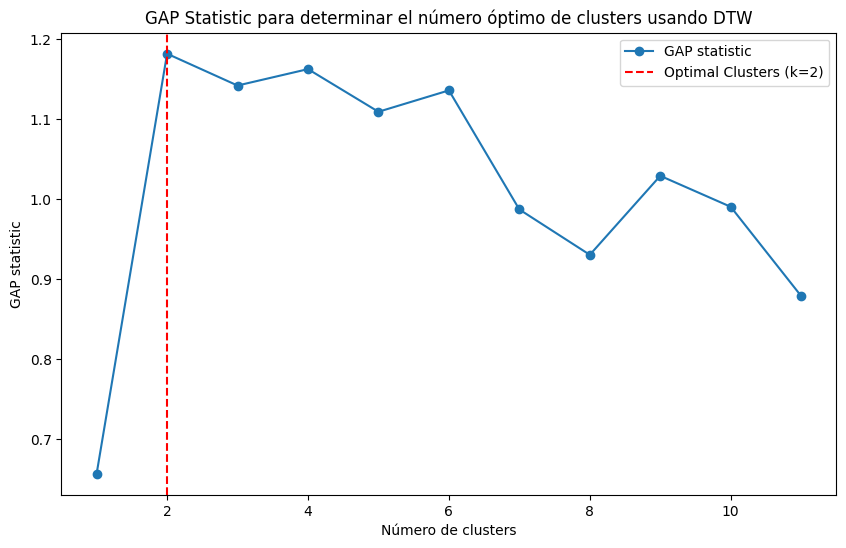

In [ ]:
# Obtener valores GAP
gaps = optimal_k.gap_df['gap_value']
k_values = optimal_k.gap_df['n_clusters']

# Graficar el GAP statistic
plt.figure(figsize=(10, 6))
plt.plot(k_values, gaps, '-o', label='GAP statistic')
plt.axvline(x=n_clusters, linestyle='--', color='red', label=f'Optimal Clusters (k={n_clusters})')
plt.xlabel('Número de clusters')
plt.ylabel('GAP statistic')
plt.title('GAP Statistic para determinar el número óptimo de clusters usando DTW')
plt.legend()
plt.show()

In [ ]:
# Obtener las etiquetas de cluster para 4 clusters (revisar posteriormente si coincide con lo que GAP sugiere)
num_clusters = 8
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [ ]:
# Crear un DataFrame con las etiquetas de cluster
cluster_df = pd.DataFrame({
    'Stock': dtw20.columns, #distance_df.columns,
    'Cluster': cluster_labels
})

print("Clusters asignados:")
print(cluster_df)

Clusters asignados:
   Stock  Cluster
0   AAPL        2
1    AMD        2
2    BAC        1
3    BBY        3
4    CVX        4
5     GE        1
6     HD        3
7    JNJ        6
8    JPM        1
9     KO        7
10   LLY        6
11   MRK        6
12  MSFT        2
13   PEP        7
14   PFE        6
15    PG        7
16   RRC        5
17   UNH        8
18   WMT        3
19   XOM        4


In [ ]:
# Calcular el valor de GAP
optimal_k = OptimalK(parallel_backend='multiprocessing')
n_clusters = optimal_k(np.array(correlacion_2), cluster_array=np.arange(1, 12))

print("Número óptimo de clusters:", n_clusters)

Número óptimo de clusters: 1


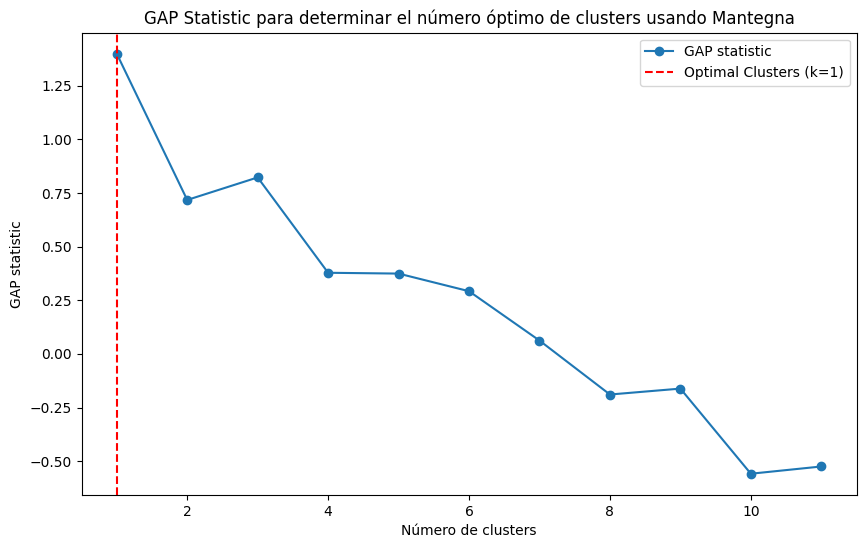

In [ ]:
# Obtener valores GAP
gaps = optimal_k.gap_df['gap_value']
k_values = optimal_k.gap_df['n_clusters']

# Graficar el GAP statistic
plt.figure(figsize=(10, 6))
plt.plot(k_values, gaps, '-o', label='GAP statistic')
plt.axvline(x=n_clusters, linestyle='--', color='red', label=f'Optimal Clusters (k={n_clusters})')
plt.xlabel('Número de clusters')
plt.ylabel('GAP statistic')
plt.title('GAP Statistic para determinar el número óptimo de clusters usando Mantegna')
plt.legend()
plt.show()